In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.gridspec as gridspec

plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)


class Molecule:
    
        def __init__(self):
            #start by defining some physical constants
            self.n_bee = 2000

def parse_input(species, molecule):
    
    script_dir='../ensembles/'
    inputfile =  str(script_dir) + str(species) + '_ads_bee.txt'
    data=pd.read_csv(inputfile, sep="\t", header=0)
    molecule.perturbation=data.iloc[:,3].to_numpy()
    
    return molecule.perturbation

In [4]:
test = Molecule()
parse_input('CC',test)

array([-27.1197385 ,  -7.654215  ,  -0.26681121, ..., -11.28469772,
        33.19425593,  -2.91509145])

In [24]:
##run each one for debugging
name='C*R*C*'
list_of_species = 'species_list_' + name +  '.dat'
info = open(list_of_species,'r')
species_list = info.readlines()
info.close()

array_list=[]
counter = -1
for species in species_list:
    counter += 1
    filename = species.strip()
    print(filename)
  
    test = Molecule()
    array_list.append(parse_input(filename, test))
    
stacked=np.stack(array_list, axis=0)
avg = np.mean(stacked, axis = 0)

output_file='ensembles/' + name + '_bee.txt'
column_names=['averaged_values']
df=pd.DataFrame(avg, columns=[column_names])
df.to_csv(output_file,sep="\t", index=False)

CCHCH2-bi
CH2CH2CH2-bi
CHCC-bi
CHCCH-bi
CHCH2CH2-bi
CHCHCH2-bi
CHCHCH-bi
CHCHC-bi
CHCH2CH-bi
CCH2C-bi


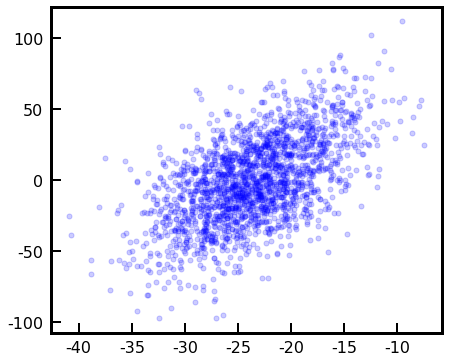

In [20]:
H=pd.read_csv('../H_ads_bee.txt', sep="\t", header=0) 
gs=gridspec.GridSpec(nrows=1, ncols=1)
gs.update(wspace=0.3, hspace=0.2)

ax0=plt.subplot(gs[0,0])

ax0.plot(H.iloc[:,1], avg,  color='b', marker='o', linestyle='None', markersize=5, alpha=0.2)     

yes


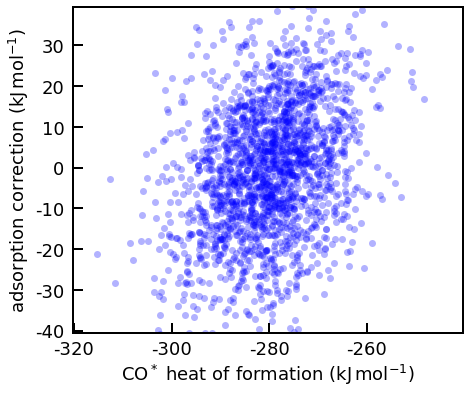

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import matplotlib.gridspec as gridspec
import scipy.stats as st
from sklearn.datasets import make_blobs

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)


colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 4)]

#This works just with *CO


def plot_bee(spcs1, spcs2):
    gs=gridspec.GridSpec(nrows=1, ncols=1)
    gs.update(wspace=0.15, hspace=0.15)

    ax0=plt.subplot(gs[0,0])
    
    rel_dir='ensembles/'
    file='_bee.txt'
    
    fname2=rel_dir + str(spcs2) +file
    data_spcs2=pd.read_csv(fname2, sep="\t", header=0)

    avg_spcs2=np.mean(data_spcs2.to_numpy())

    
    if spcs1 == 'CO':
        print("yes")
        fname1="../ensembles/CO_ads_bee.txt"
        data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
        avg_spcs1=np.mean(data_spcs1.iloc[:,1].to_numpy())
        ax0.plot(data_spcs1.iloc[:,1], data_spcs2,  marker='o', linestyle='None', markersize=7, 
             markerfacecolor='b',markeredgewidth=0, alpha=0.3, zorder=1)
    else:
        fname1=rel_dir + str(spcs1) +file
        data_spcs1=pd.read_csv(fname1, sep="\t", header=0)    
        avg_spcs1=np.mean(data_spcs1.iloc[:,1])
        ax0.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
             markerfacecolor='b',markeredgewidth=0, alpha=0.3, zorder=1)
            


    #ax0.plot(avg_spcs1,avg_spcs2 ,  color='k', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
    #         label='$\mathrm{mean}$')


    xlabel='$\mathrm{'+ str(spcs1) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
    ylabel='$\mathrm{adsorption\ correction\ (kJ\, mol^{-1})}$'
    ax0.set_xlabel(xlabel)
    ax0.set_ylabel(ylabel)
    ax0.set_xlim([avg_spcs1-40, avg_spcs1+40])
    ax0.set_ylim([avg_spcs2-40, avg_spcs2+40])
    
    png_name='bee_scatter_' + str(spcs1) + '_' + str(spcs2) + '.jpg'
    plt.savefig(png_name, dpi=300, bbox_inches='tight', transparent=False)
    
    plt.show()

plot_bee('CO','O-*CR2')